
Interpolation
========================================================

The Radial-basis function networks (RBF) address the problem of curve-ﬁtting, that is
approximation in high-dimensional spaces. Learning in this case is equivalent to ﬁnding an
interpolating surface in the multidimensional space that provides a best ﬁt to the training data,
measured by preselected statistical criteria.

The Radial-basis functions technique suggests constructing of interpolation functions F of the following form:

$$F(x)=\sum_{i=1}^Nw_i\phi(||x-x_i||)$$ 

where: $\phi(||x-x_i||)$ is a set of nonlinear radial-basis functions, $x_i$ are the centers of these functions, and ||.|| is the Euclidean norm.
The unknown weights can be formed by solving the following linear matrix equation: 

$$w=(\phi^T\phi)^{-1}\phi^T y$$ 

where: 'w' is the weight vector, 'y' is the response vector, and $\phi$ is the design matrix 

$$\phi=\phi_{ei}\ |\ \phi_{ei}=\phi(||x_e-x_i||), (e,i)=1,2,...,N$$

Several widely used functions are:
- *Multiquadrics*:  $\phi(x)=(x^2+c^2)^{1/2}$ for some $c>0$
- *Inverse multiquadrics*:  $\phi(x)=1/(x^2+c^2)^{1/2}$ for some $c>0$
- *Gaussian*:  $\phi(x)=exp(-x^2/2\sigma^2)$ for some $\sigma>0$



## 1D Network Architecture







## 2D Network Architecture








RBF Training Algorithm
========================================================

Let $g_{ij}$ be an element of matrix $G$ representing the output of $j^{th}$ neuron for $i^{th}$ input vector and $W_{ij}$ be an element of matrix $W$ representing weight connecting $i^{th}$ output neuron to $j^{th}$ hidden neuron. In RBF, the activation function of output neuron is linear i.e. "$g(z)=z$" where $z$ is the weighted summation of signals from hidden layer. Multiplying $i^{th}$ row of $G$ with $j^{th}$ columns of $W$ does the weighted summation of signals from the hidden layer which is equal to signal produced by $j^{th}$ output neuron.

$$GW=T$$

Where $T$ is a column vector and $i^{th}$ row contains the target value (actual desired output) of $i^{th}$ training vector.

From above equation, by method of pseudo inverse,

$$W=(G^T G)^{-1}G^T T$$

where $G^T$ is transpose of matrix $G$.

## Algorithm

- Define the number of hidden neurons.
- Set the positions of RBF centres using K-means clustering algorithm.
- Calculate σ using equation $\sigma=\frac{d}{\sqrt{2M}}$.
- Calculate actions of RBF node using equation $\phi(x)=e^{-\frac{||x-\mu||^2}{\sigma^2}}$. 
- Train the output using equation $W=(G^T G)^{-1}G^T T$.



# RBF Interpolation Examples

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from RBFN import RBFN

## 1D Interpolation example

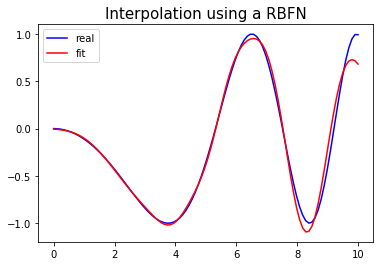

In [11]:
# generating data
x = np.linspace(0, 10, 100)
y = np.sin(-x**2/9.0)

# fitting RBF-Network with data
model = RBFN(hidden_shape=10, sigma=1.)
model.fit(x, y)
y_pred = model.predict(x)

# plotting 1D interpolation
plt.plot(x, y, 'b-', label='real')
plt.plot(x, y_pred, 'r-', label='fit')
plt.legend(loc='best')
plt.title('Interpolation using a RBFN',fontsize=15)
plt.show()

## 2D Interpolation example

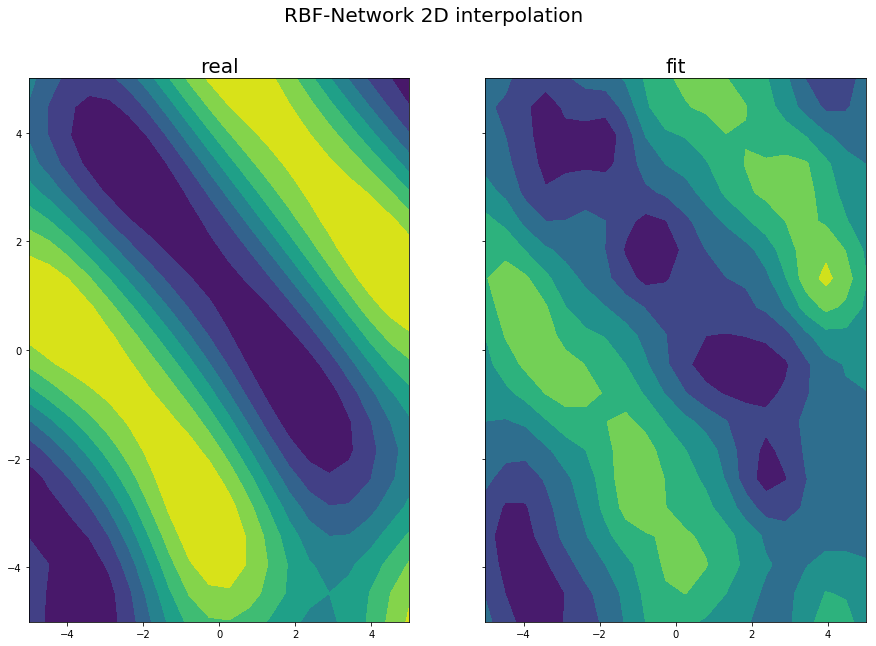

In [12]:
# generating dummy data for interpolation
x, y = np.meshgrid(np.linspace(-5, 5, 20), np.linspace(-5, 5, 20))
z = (np.sin(np.sqrt((x - 7.)**2 + (y - 9)**2)) -
     np.sin(np.sqrt((x + 5.)**2 + (y + 4)**2))) / 2.

# fitting RBF-Network with data
features = np.asarray(list(zip(x.flatten(), y.flatten())))
model = RBFN(hidden_shape=70, sigma=1.)
model.fit(features, z.flatten())
predictions = model.predict(features)

# plotting 2D interpolation
figure, (axis_left, axis_right) = plt.subplots(1, 2, figsize=(15, 10), sharey=True)
figure.suptitle('RBF-Network 2D interpolation', fontsize=20)
axis_right.set_title('fit', fontsize=20)
axis_left.set_title('real', fontsize=20)
axis_left.contourf(x, y, z)
right_image = axis_right.contourf(x, y, predictions.reshape(20, 20))
plt.show()